In [6]:
# Load Modules
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Set Plotting Styles
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (18, 18)

# Load Data
comed_df = pd.read_csv('Resources/DataFiles/COMED_hourly.csv', index_col=[0], parse_dates=[0])

# Sort Data
comed_df.sort_index(inplace=True)

In [7]:
# Identify Duplicate Indices
duplicate_index = comed_df[comed_df.index.duplicated()]
comed_df.loc[duplicate_index.index.values, :]

,COMED_MW
Datetime,
2014-11-02 02:00:00,9184.0
2014-11-02 02:00:00,8869.0
2015-11-01 02:00:00,8270.0
2015-11-01 02:00:00,7923.0
2016-11-06 02:00:00,8028.0
2016-11-06 02:00:00,7814.0
2017-11-05 02:00:00,8198.0
2017-11-05 02:00:00,7878.0


In [8]:
# Replace Duplicates with Mean Value
comed_df = comed_df.groupby('Datetime').agg(np.mean)

# Set DatetimeIndex Frequency
comed_df = comed_df.asfreq('H')

In [9]:
# Determine # of Missing Values
print('# of Missing COMED_MW Values: {}'.format(len(comed_df[comed_df['COMED_MW'].isna()])))

# of Missing COMED_MW Values: 11


In [10]:
# Impute Missing Values
comed_df['COMED_MW'] = comed_df['COMED_MW'].interpolate(limit_area='inside', limit=None)

In [11]:
def create_features(df):
    df['Date'] = df.index
    df['Hour'] = df['Date'].dt.hour
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Quarter'] = df['Date'].dt.quarter
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['DayOfYear'] = df['Date'].dt.dayofyear
    df['DayOfMonth'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.weekofyear
    df['DayOfYearFloat'] = df['DayOfYear'] + df['Hour'] / 24
    df.drop('Date', axis=1, inplace=True)
    return df

comed_df = create_features(comed_df)

C:\Users\plymb\AppData\Local\Temp\ipykernel_23028\3286965434.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['WeekOfYear'] = df['Date'].dt.weekofyear


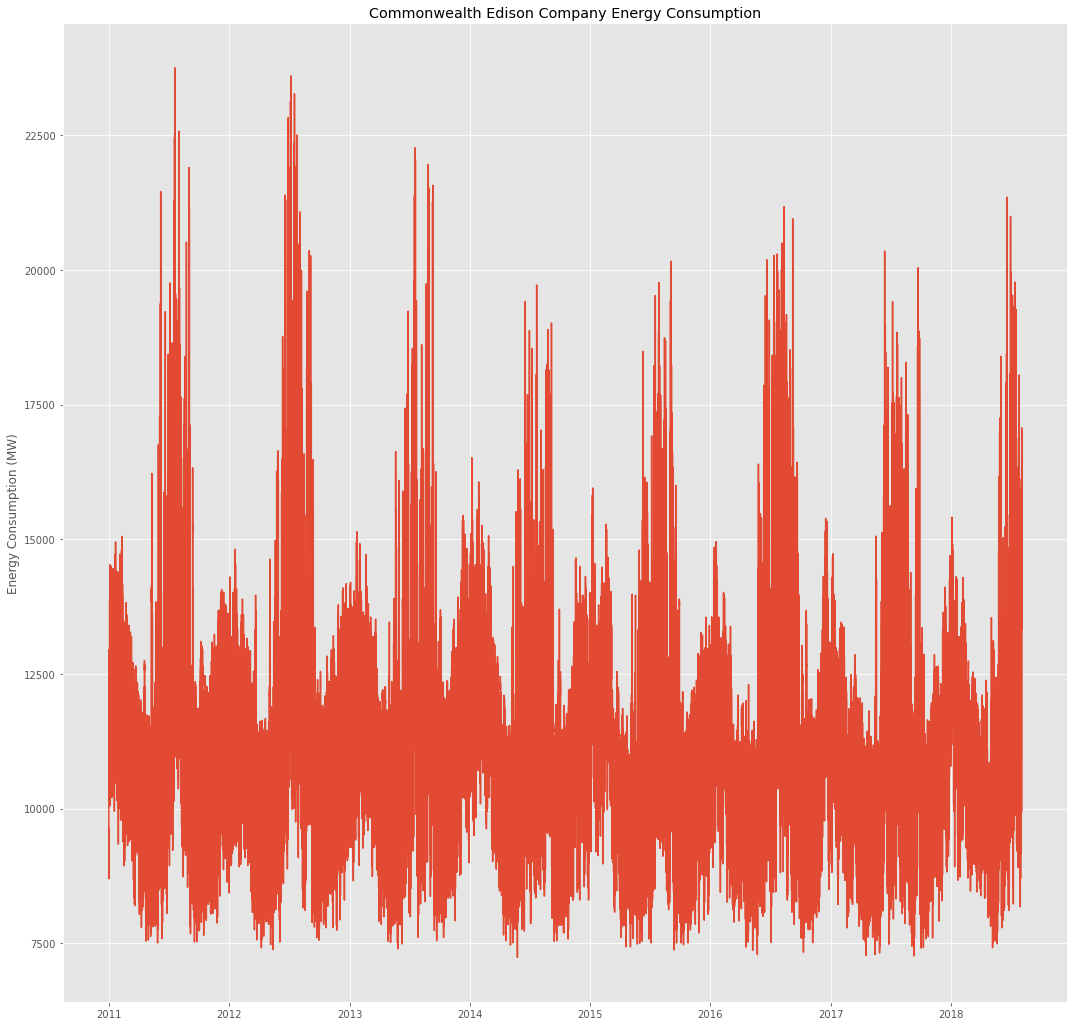

In [13]:
plt.plot(comed_df.index, comed_df['COMED_MW'])
plt.title('Commonwealth Edison Company Energy Consumption')
plt.ylabel('Energy Consumption (MW)')
plt.savefig('images/time_series_plot.png')
plt.show()